In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

Below is the probability density function for a normal mixture model with three components, as described in the study of acid neutralization capacity in lakes. This equation is formatted in LaTeX for use in a Markdown Jupyter Notebook cell, enclosed in `$$` delimiters for proper rendering.

$$
f(x) = \sum_{j=1}^3 p_j \cdot \frac{e^{-(x - \mu_j)^2 / (2 w_j^2)}}{\sqrt{2\pi} w_j}
$$

This equation represents a mixture of three normal distributions, where:
- $ p_j $ are the mixing proportions, satisfying $ \sum_{j=1}^3 p_j = 1 $ and $ p_j \geq 0 $,
- $ \mu_j $ are the means of each component,
- $ w_j $ are the standard deviations of the respective normal distributions.

When used in a Jupyter Notebook Markdown cell, the equation above will render as a centered, block-style mathematical expression, suitable for displaying the probability density function in a clear and professional format.

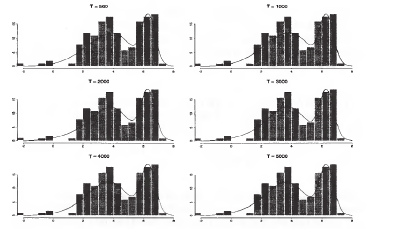

Looking at this image, I see figures showing the evolution of density estimation for three compounds over time, labeled as Fig.7. The image includes six bar charts arranged in a 3×2 grid, with each showing different time periods (Y values).



$$\sigma_i^{-1} \text{ is distributed from a } t_{p_0(1)} \text{ distribution. The simulation steps for } \sigma_i \text{ are}$$
$$\text{modified, but there exists a direct Accept-Reject algorithm to simulate from}$$
$$\text{the conditional posterior distribution of the }\sigma_i^{-1}\text{ in each iteration while}$$
$$\text{upon the identifiability constraints and to use a hybrid Markov chain Monte}$$
$$\text{Carlo algorithm, where, in every } t \text{ iteration, a random permutation of the}$$
$$\text{values of } \theta \text{ is generated via a Metropolis-Hastings scheme:}$$

**Algorithm A.35: Hybrid Allocation Mixture Estimation**

1. Generate a random permutation $\rho$ on $\{1,\ldots,k\}$ and 
   $$\hat{\xi} = (\Theta(\xi))_i \text{ and } \hat{\xi} = (\rho,\hat{p},\hat{w}) = (p_{\rho(1)},\ldots,p_{\rho(k)},w_{\rho(1)},\ldots)$$

2. Generate $\rho'$ conditionally on $(\xi,\hat{\xi})$ by a standard Gibbs 
   sampler iteration.

3. Accept $\rho'$ with probability
   $$\min\left\{1, \frac{\pi(\xi'|\rho')\pi(\rho'|\xi')\pi(\xi'|\rho')\pi(\xi')^{-1}\pi(\xi)^{-1}}{\pi(\xi|\rho)\pi(\rho|\xi)\pi(\xi|\rho)\pi(\xi')^{-1}\pi(\xi)^{-1}}\right\} \times A.1,$$

where $\pi(\xi, z)$ denotes the distribution of $(\xi, z)$.

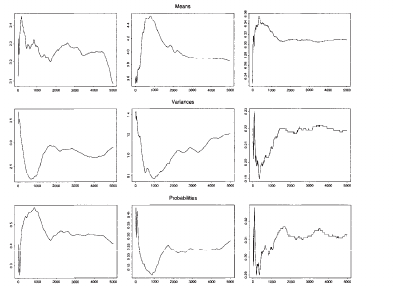



# Convergence of Estimators of the Parameters of the Mixture

## Fig.8

Convergence of estimators of the parameters of the mixture (10.13) for the same iterations as in Fig.7.

$$
\pi(\xi, z) \propto \prod_{i=1}^{n} \left( \sum_{j=1}^{k} p_j \frac{ e^{-(y_i - \mu_j)^2 / (2\sigma_j^2)} }{ w_{ij} } \mathbf{1}_{z_i = j} \right) \pi(\xi),
$$

where $\pi_i(z|\xi)$ and $\pi_{\xi}(\xi | z, \xi)$ are the conditional distributions used in the Gibbs sampler and $$z$$ is the previous value of the allocation vector. Note that, in (10.14), 

$$
\pi(\xi | -z^{(t)}) = \pi_i(\xi | \xi).
$$

This additional Metropolis–Hastings step may result in delicate computations in terms of manipulation of indices, but it is of the same order of complexity as an iteration of the Gibbs sampler since the latter also requires the computation of the sums:

$$
\sum_{j=1}^{k} p_j f_j(x_i | \xi_j), \quad i = 1, \dots, n.
$$

The value of $U$ in [A.45] can be arbitrarily fixed (for instance, at 50) and later modified depending on the average acceptance rate corresponding to (10.14). A high acceptance rate means that the Gibbs sampler lacks a sufficient number of iterations to produce a stable allocation to homogeneous classes; a low acceptance rate suggests reduction of $U$ so as to more quickly explore the possible permutations.


In [ ]:
import random
import math

# Define helper functions for Gaussian PDF and sampling
def gaussian_pdf(x, mean, variance):
    """Compute Gaussian probability density function (PDF)."""
    coeff = 1 / math.sqrt(2 * math.pi * variance)
    exponent = math.exp(-((x - mean) ** 2) / (2 * variance))
    return coeff * exponent

def sample_gaussian(mean, variance):
    """Generate a random sample from a Gaussian distribution using Box-Muller transform."""
    u1 = random.random()
    u2 = random.random()
    z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    return mean + math.sqrt(variance) * z

# Initialize Gaussian Mixture parameters
num_clusters = 3
weights = [1.0 / num_clusters] * num_clusters  # Equal weight initialization
means = [-2.0, 0.0, 2.0]  # Initial means
variances = [1.0, 1.0, 1.0]  # Initial variances
data = [-1.5, 0.2, 1.7, -2.1, 0.9, 2.5, -1.0, 1.3]  # Example dataset
num_iterations = 100

# Assign initial clusters randomly
assignments = [random.randint(0, num_clusters - 1) for _ in data]

# Gibbs Sampling with Metropolis-Hastings update
for iteration in range(num_iterations):
    # Step 1: Gibbs Sampling - Assign each data point to a cluster
    for i, x in enumerate(data):
        probabilities = []
        for j in range(num_clusters):
            p = weights[j] * gaussian_pdf(x, means[j], variances[j])
            probabilities.append(p)
        
        # Normalize probabilities
        total = sum(probabilities)
        probabilities = [p / total for p in probabilities]
        
        # Sample new cluster assignment
        rand_val = random.random()
        cumulative = 0.0
        for j, p in enumerate(probabilities):
            cumulative += p
            if rand_val < cumulative:
                assignments[i] = j
                break

    # Step 2: Metropolis-Hastings - Update cluster parameters
    for j in range(num_clusters):
        assigned_points = [data[i] for i in range(len(data)) if assignments[i] == j]
        
        if assigned_points:
            # Compute new mean proposal
            new_mean = sum(assigned_points) / len(assigned_points) + sample_gaussian(0, 0.1)
            acceptance_ratio = min(1, gaussian_pdf(new_mean, sum(assigned_points) / len(assigned_points), 1))
            
            if random.random() < acceptance_ratio:
                means[j] = new_mean
        
        # Update variances (simplified for illustration)
        if assigned_points:
            new_variance = sum((x - means[j]) ** 2 for x in assigned_points) / len(assigned_points)
            variances[j] = new_variance + sample_gaussian(0, 0.1)

# Print final results
print("Final Means:", means)
print("Final Variances:", variances)
print("Final Assignments:", assignments)


# Rao-Blackwellization

Some of the Rao-Blackwellization results of Section 9.3 carry over to the multi-stage Gibbs sampler.  
For example, Lin et al. (1995) are able to extend Proposition 9.18 to the multi-stage Gibbs sampler in the case of the **random Gibbs sampler**, where every step only updates a single component of $ y $.  
In the setup of [A.40], define a multinomial distribution:

$$
\sigma = (\sigma_1, \dots, \sigma_p).
$$

## **Algorithm A.46 - Random Gibbs Sampler**

**Given $ y $:**
1. Select a component $ \nu \sim \sigma $.
2. Generate  

$$
Y^{(t+1)}_{\nu} \sim g_{\nu}(y^{(t)} | j \neq \nu), \quad \text{and take} \quad Y^{(t+1)}_j = y_j^{(t)} \quad \text{for } j \neq \nu.
$$

Note that, although [A.46] only generates one component of $ y $ at each iteration,  
the resulting chain is **strongly irreducible** (Definition 6.13) because of the random choice of $ \nu $.  
It also satisfies the following property.

---

## **Proposition 10.28**  
The chain $ Y^{(t)} $ generated by [A.46] has the property that for every function $ h \in L_2(g) $,  
the covariance  

$$
\operatorname{cov}(h(Y^{(t)}), h(Y^{(t+\tau)}))
$$

is **positive and decreasing** in $ \tau $.

---

## **Proof**  

Assume 

$$
\mathbb{E}_g[h(Y^{(t)})] = 0,
$$ 

then  

$$
\mathbb{E}_g[h(Y^{(0)}) h(Y^{(t)})] = \sum_{\nu=1}^{p} \sigma_{\nu} \mathbb{E}_g[h(Y^{(0)}) h(Y^{(t)}) | Y^{(0)}_{\nu} = w, (Y^{(0)}_j, j \neq \nu)].
$$

$$
= \sum_{\nu} \sigma_{\nu} \mathbb{E}_g[h(Y^{(0)}) E[h(Y^{(t)}) | Y^{(0)}_j, j \neq \nu]].
$$

$$
= \mathbb{E}_g[h(Y^{(0)}) (Y_j, j \neq \nu)]^2,
$$

due to the **reversibility** of the chain and the **independence** between $ Y^{(0)} $ and $ Y^{(1)} $,  
conditionally on $ \nu $ and $ (Y^{(0)}_j, j \neq \nu) $.  
A simple recursion implies  

$$
\mathbb{E}_g[h(Y^{(0)}) h(Y^{(t)})] = \operatorname{var}_g \big( \mathbb{E}_g[ h(Y) | Y_{\nu}, (Y_j, j \neq \nu)] \big) \dots.
$$

---

The second term involves **$ t $ conditional expectations**, successively in $ (\nu, (y_j, j \neq \nu)) $ and in $ Y $.  

- This suggests **choosing a distribution** $ \sigma $ that more heavily weights components **with small**  

$$
\operatorname{E}_g[h(Y)| (Y_j, j \neq \nu)]^2
$$

so the chain will typically visit states where $ g_{\nu}(y^{(t)} | j \neq \nu) $ is not too variable.  
- However, the opposite choice seems more logical when considering the **speed of convergence** to stationarity.

### **Rao-Blackwellization for Density Approximation**

Another substantial benefit of Rao-Blackwellization is an elegant method for the approximation of **densities** of different components of $ y $. Since

$$
\frac{1}{T} \sum_{t=1}^{T} g_{\lambda} (w | y^{(t)}, j \neq \lambda)
$$

is **unbiased** and converges to the marginal density $ g_{\lambda}(y) $,  
if these conditional densities are available in **closed form**,  
it is **unnecessary (and inefficient)** to use nonparametric density estimation methods such as **kernel methods**  
(see **Fan and Gijbels 1996** or **Wand and Jones 1995**).  

This property can also be used in **extensions of the Riemann sum method** (see **Section 4.3**)  
to setups where the density $ f $ needs to be approximated  
(see **Problem 17**).

---

### **Batch Sampling in MCMC**
Another consequence of **Proposition 9.18** is a justification of the technique of **batch sampling**  
proposed in some **MCMC algorithms**  
(see **Geyer 1992**, **Raftery and Lewis 1992**, **Diebolt and Robert 1994**).  

Batch sampling **involves subsampling** the sequence $ Y^{(t)} $  
produced by a Gibbs sampling method into $ (Y^{(k)}) $, $ (k > 1) $,  
to **decrease dependence** between the points of the sample.  

However, **Lemma 12.2** describes a **negative impact** of subsampling  
on the **variance of the corresponding estimators**.

---

## ** Improper Priors**

This section **discusses a particular danger** resulting from careless use of **Metropolis-Hastings algorithms**,  
in particular, the **Gibbs sampler**.

- The **Gibbs sampler** is based on **conditional distributions**  
  derived from **$ f(x_1, \dots, x_q) $** or **$ g(y_1, \dots, y_p) $**.  
- A **serious issue** arises when these **conditional distributions** may **be well defined**  
  and may **be simulated from**, but may not correspond to **any joint distribution $ g $**.

That is, the function $ g $ given by **Lemma 15**  
does **not integrate to 1**, so the ratio

$$
\pi (\theta) \propto \frac{\pi(\theta)}{q(\theta)}
$$

**fails** to define a **Metropolis-Hastings algorithm** for **$ \pi(\theta)/q(\theta) $**.

> *This problem is not a defect of the Gibbs sampler*,  
> *nor even a simulation problem*,  
> *but rather a problem of assuming the Gibbs sampler in situations  
where the underlying assumptions are violated.*

Nonetheless, **practitioners** using **MCMC algorithms**  
against **this danger** often **encounter rejections**  
(see **Besagian noninformative** or **"default" models**).

- The issue occurs **when the Gibbs sampler directly** faces **improper priors**,  
  meaning there is **a strong incentive** to **bypass checking**  
  for the propriety of $ g $.

- **(9) The “distribution” $ g $ does not exist in this case.**
### **Rao-Blackwellization for Density Approximation**

Another substantial benefit of Rao-Blackwellization is an elegant method for the approximation of **densities** of different components of $ y $. Since

$$
\frac{1}{T} \sum_{t=1}^{T} g_{\lambda} (w | y^{(t)}, j \neq \lambda)
$$

is **unbiased** and converges to the marginal density $ g_{\lambda}(y) $,  
if these conditional densities are available in **closed form**,  
it is **unnecessary (and inefficient)** to use nonparametric density estimation methods such as **kernel methods**  
(see **Fan and Gijbels 1996** or **Wand and Jones 1995**).  

This property can also be used in **extensions of the Riemann sum method** (see **Section 4.3**)  
to setups where the density $ f $ needs to be approximated  
(see **Problem 10.17**).

---

### **Batch Sampling in MCMC**
Another consequence of **Proposition 9.18** is a justification of the technique of **batch sampling**  
proposed in some **MCMC algorithms**  
(see **Geyer 1992**, **Raftery and Lewis 1992**, **Diebolt and Robert 1994**).  

Batch sampling **involves subsampling** the sequence $ Y^{(t)} $  
produced by a Gibbs sampling method into $ (Y^{(k)}) $, $ (k > 1) \),  
to **decrease dependence** between the points of the sample.  

However, **Lemma 12.2** describes a **negative impact** of subsampling  
on the **variance of the corresponding estimators**.

---

## ** Improper Priors**

This section **discusses a particular danger** resulting from careless use of **Metropolis-Hastings algorithms**,  
in particular, the **Gibbs sampler**.

- The **Gibbs sampler** is based on **conditional distributions**  
  derived from **$ f(x_1, \dots, x_q) $** or **$ g(y_1, \dots, y_p) $**.  
- A **serious issue** arises when these **conditional distributions** may **be well defined**  
  and may **be simulated from**, but may not correspond to **any joint distribution $ g $**.

That is, the function $ g $ given by **Lemma 10.15**  
does **not integrate to 1**, so the ratio

$$
\pi (\theta) \propto \frac{\pi(\theta)}{q(\theta)}
$$

**fails** to define a **Metropolis-Hastings algorithm** for **$ \pi(\theta)/q(\theta) **.

> *This problem is not a defect of the Gibbs sampler*,  
> *nor even a simulation problem*,  
> *but rather a problem of assuming the Gibbs sampler in situations  
where the underlying assumptions are violated.*

Nonetheless, **practitioners** using **MCMC algorithms**  
against **this danger** often **encounter rejections**  
(see **Besagian noninformative** or **"default" models**).

- The issue occurs **when the Gibbs sampler directly** faces **improper priors**,  
  meaning there is **a strong incentive** to **bypass checking**  
  for the propriety of $ g $.

- **(9) The “distribution” $ g $ does not exist in this case.**


In [2]:
import random
import math

class GibbsSampler:
    def __init__(self, initial_x=0, initial_y=0, num_samples=1000, burn_in=100):
        self.x = initial_x
        self.y = initial_y
        self.num_samples = num_samples
        self.burn_in = burn_in
        self.samples = []

    def conditional_x(self, y):
        """P(x | y) ~ Normal(y/2, sqrt(1/2))"""
        mean = y / 2
        std_dev = math.sqrt(0.5)
        return random.gauss(mean, std_dev)

    def conditional_y(self, x):
        """P(y | x) ~ Normal(x/2, sqrt(1/2))"""
        mean = x / 2
        std_dev = math.sqrt(0.5)
        return random.gauss(mean, std_dev)

    def run(self):
        for _ in range(self.num_samples + self.burn_in):
            self.x = self.conditional_x(self.y)
            self.y = self.conditional_y(self.x)

            if _ >= self.burn_in:  # Ignore burn-in samples
                self.samples.append((self.x, self.y))

        return self.samples

    def get_marginal_x(self):
        """Rao-Blackwellized Estimator for P(X)"""
        x_values = [sample[0] for sample in self.samples]
        return sum(x_values) / len(x_values)  # Expectation E[X]

    def get_marginal_y(self):
        """Rao-Blackwellized Estimator for P(Y)"""
        y_values = [sample[1] for sample in self.samples]
        return sum(y_values) / len(y_values)  # Expectation E[Y]

# Running Gibbs Sampler
sampler = GibbsSampler(num_samples=5000)
samples = sampler.run()

# Estimating Marginal Densities using Rao-Blackwellization
marginal_x = sampler.get_marginal_x()
marginal_y = sampler.get_marginal_y()

print(f"Estimated E[X]: {marginal_x}")
print(f"Estimated E[Y]: {marginal_y}")


Estimated E[X]: -0.0036481864863110694
Estimated E[Y]: -0.004886897569216009


# Rao-Blackwellization and Gibbs Sampling

## Integration Over \( \pi(\theta, \sigma) \)
$$
\int f(x|\zeta) \pi(\zeta) d\zeta = \int \frac{1}{\sqrt{2\pi}\sigma} e^{-(x-\theta)^2 / (2\sigma^2)} \frac{d\theta \, d\sigma}{\sigma^2} = \infty,
$$
which implies that \( \pi(\theta, \sigma | x) \) is not well-defined.

## Posterior Proportionality
The posterior distribution can be written as:
$$
\pi(\theta | x, \sigma^2) \propto e^{-(\theta - x)^2 / (2\sigma^2)},
$$
$$
\pi(\sigma | \theta, x) \propto \sigma^{-3} e^{-(\theta - x)^2 / (2\sigma^2)},
$$
leading to the full conditional distributions:
$$
\theta | x, \sigma^2 \sim \mathcal{N}(x, \sigma^2),
$$
$$
\sigma^{-2} | \theta, x \sim \text{Exp} \left( \frac{(\theta - x)^2}{2} \right).
$$

## Gibbs Sampling Algorithm
A possible Gibbs sampling algorithm for this setup is:

1. Simulate 
   $$
   \theta^{(t+1)} \sim \mathcal{N}(x, \sigma^2).
   $$
2. Simulate 
   $$
   \sigma^{-2}_{(t+1)} \sim \text{Exp} \left( \frac{(\theta^{(t+1)} - x)^2}{2} \right).
   $$
3. Compute 
   $$
   \sigma^{(t+1)} = 1 / \sqrt{\sigma^{-2}_{(t+1)}}.
   $$

---

# Example 31: Random Effects Posterior Model
Consider a random effects model:
$$
y_{ij} = \beta + U_i + \epsilon_{ij}, \quad i = 1, \dots, I, \quad j = 1, \dots, J
$$

where
$$
U_i \sim \mathcal{N}(0, \sigma^2), \quad \epsilon_{ij} \sim \mathcal{N}(0, \tau^2).
$$

The Jeffreys (improper) prior for \( \beta, \sigma^2, \) and \( \tau^2 \) is:
$$
\pi(\beta, \sigma^2, \tau^2) = \frac{1}{\sigma^2 \tau^2}.
$$

## Conditional Distributions
The full conditional distributions are:

$$
U_i | y_{ij}, \beta, \sigma^2, \tau^2 \sim \mathcal{N} \left( \frac{J(\bar{y_i} - \beta)}{J + \tau^2 / \sigma^2}, (J\tau^2 + \sigma^2)^{-1} \right),
$$

$$
\beta | y_{ij}, U_i, \sigma^2, \tau^2 \sim \mathcal{N} \left( \bar{y}, \frac{\tau^2}{J} \right),
$$

$$
\sigma^2 | U_i, \beta, y_{ij}, \tau^2 \sim \text{IG} \left( \frac{I}{2}, \frac{1}{2} \sum U_i^2 \right),
$$

$$
\tau^2 | \beta, y_{ij}, U_i \sim \text{IG} \left( \frac{IJ}{2}, \frac{1}{2} \sum_{ij} (y_{ij} - U_i - \beta)^2 \right).
$$


# Rao-Blackwellization and Gibbs Sampling

## Integration Over $ \pi(\theta, \sigma) $
$$
\int f(x|\zeta) \pi(\zeta) d\zeta = \int \frac{1}{\sqrt{2\pi}\sigma} e^{-(x-\theta)^2 / (2\sigma^2)} \frac{d\theta \, d\sigma}{\sigma^2} = \infty,
$$
which implies that $ \pi(\theta, \sigma | x) $ is not well-defined.

## Posterior Proportionality
The posterior distribution can be written as:
$$
\pi(\theta | x, \sigma^2) \propto e^{-(\theta - x)^2 / (2\sigma^2)},
$$
$$
\pi(\sigma | \theta, x) \propto \sigma^{-3} e^{-(\theta - x)^2 / (2\sigma^2)},
$$
leading to the full conditional distributions:
$$
\theta | x, \sigma^2 \sim \mathcal{N}(x, \sigma^2),
$$
$$
\sigma^{-2} | \theta, x \sim \text{Exp} \left( \frac{(\theta - x)^2}{2} \right).
$$

## Gibbs Sampling Algorithm
A possible Gibbs sampling algorithm for this setup is:

1. Simulate 
   $$
   \theta^{(t+1)} \sim \mathcal{N}(x, \sigma^2).
   $$
2. Simulate 
   $$
   \sigma^{-2}_{(t+1)} \sim \text{Exp} \left( \frac{(\theta^{(t+1)} - x)^2}{2} \right).
   $$
3. Compute 
   $$
   \sigma^{(t+1)} = 1 / \sqrt{\sigma^{-2}_{(t+1)}}.
   $$

---

# Example 31: Random Effects Posterior Model
Consider a random effects model:
$$
y_{ij} = \beta + U_i + \epsilon_{ij}, \quad i = 1, \dots, I, \quad j = 1, \dots, J
$$

where
$$
U_i \sim \mathcal{N}(0, \sigma^2), \quad \epsilon_{ij} \sim \mathcal{N}(0, \tau^2).
$$

The Jeffreys (improper) prior for $ \beta, \sigma^2, $ and $ \tau^2 $ is:
$$
\pi(\beta, \sigma^2, \tau^2) = \frac{1}{\sigma^2 \tau^2}.
$$

## Conditional Distributions
The full conditional distributions are:

$$
U_i | y_{ij}, \beta, \sigma^2, \tau^2 \sim \mathcal{N} \left( \frac{J(\bar{y_i} - \beta)}{J + \tau^2 / \sigma^2}, (J\tau^2 + \sigma^2)^{-1} \right),
$$

$$
\beta | y_{ij}, U_i, \sigma^2, \tau^2 \sim \mathcal{N} \left( \bar{y}, \frac{\tau^2}{J} \right),
$$

$$
\sigma^2 | U_i, \beta, y_{ij}, \tau^2 \sim \text{IG} \left( \frac{I}{2}, \frac{1}{2} \sum U_i^2 \right),
$$

$$
\tau^2 | \beta, y_{ij}, U_i \sim \text{IG} \left( \frac{IJ}{2}, \frac{1}{2} \sum_{ij} (y_{ij} - U_i - \beta)^2 \right).
$$

## Improper Random Effects Posterior

### Model Description
Consider a random effects model:
$$
y_{ij} = \beta + U_i + \epsilon_{ij}, \quad i = 1, \dots, I, \quad j = 1, \dots, J
$$

where
$$
U_i \sim \mathcal{N}(0, \sigma^2), \quad \epsilon_{ij} \sim \mathcal{N}(0, \tau^2).
$$

## Jeffreys Prior
The Jeffreys (improper) prior for the parameters \( \beta, \sigma^2, \tau^2 \) is given by:
$$
\pi(\beta, \sigma^2, \tau^2) = \frac{1}{\sigma^2 \tau^2}.
$$

## Conditional Distributions
The full conditional distributions are:

### For \( U_i \)
$$
U_i | y_{ij}, \beta, \sigma^2, \tau^2 \sim \mathcal{N} \left( \frac{J(\bar{y_i} - \beta)}{J + \tau^2 / \sigma^2}, (J\tau^2 + \sigma^2)^{-1} \right).
$$

### For \( \beta \)
$$
\beta | y_{ij}, U_i, \sigma^2, \tau^2 \sim \mathcal{N} \left( \bar{y}, \frac{\tau^2}{J} \right).
$$

### For \( \sigma^2 \)
$$
\sigma^2 | U_i, \beta, y_{ij}, \tau^2 \sim \text{IG} \left( \frac{I}{2}, \frac{1}{2} \sum U_i^2 \right).
$$

### For \( \tau^2 \)
$$
\tau^2 | \beta, y_{ij}, U_i \sim \text{IG} \left( \frac{IJ}{2}, \frac{1}{2} \sum_{ij} (y_{ij} - U_i - \beta)^2 \right).
$$

---

## Observations on Improper Priors
The improper nature of the Jeffreys prior means that:
- The posterior distribution may not be proper.
- The Gibbs sampler may still appear to work even when the posterior diverges.
- Special care is needed when assessing convergence.

This discussion is motivated by results from Hobert and Casella (1996, 1998), illustrating cases where a Gibbs sampler appears to function correctly but has hidden divergences.
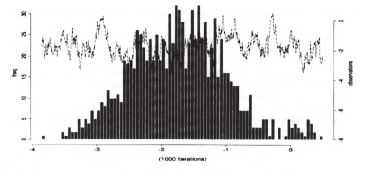



## Random Effects Model - Gibbs Sampling

## Sequence and Histogram
Fig.10 shows the sequence of $ \beta^{(t)} $ produced by the Gibbs sampling algorithm and the corresponding histogram after 1000 iterations. The measurement scale for the $ \beta^{(t)} $'s is on the right, and the scale of the histogram is on the left.

## Convergence Condition
Under some regularity conditions on the transition kernel, Hobert and Casella (1996) have shown that if there exists a positive function $ b $, $ \epsilon > 0 $, and a compact set $ C $ such that:
$$
b(x) > \epsilon \quad \text{for} \quad x \in C^c,
$$
then the chain $ (y^{(t)}) $ satisfies:

$$
\liminf_{t \to \infty} \frac{1}{t} \sum_{i=1}^{t} b(y^{(i)}) = 0.
$$

## Interpretation
A drawback of the condition in (10.15) is the derivation of the function $ b $, which makes the monitoring of $ \liminf $ delicate in a simulation experiment. Other references on the analysis of improper Gibbs samplers can be found in:
- Besag et al. (1995)
- Roberts and Sahu (1997)
- Natarajan and McCulloch (1998)

These references discuss issues in convergence when using improper priors and how Gibbs samplers can behave unexpectedly under certain conditions.



In [ ]:
import random
import math

# Function to generate a random normal sample using Box-Muller transform
def normal_sample(mean, variance):
    u1 = random.random()
    u2 = random.random()
    z = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    return mean + z * math.sqrt(variance)

# Function to generate a random inverse-gamma sample
def inv_gamma_sample(alpha, beta):
    # Using 1 / Gamma(alpha, 1/beta)
    gamma_sample = sum([-math.log(random.random()) for _ in range(alpha)])
    return beta / gamma_sample

# Gibbs Sampler for Random Effects Model
def gibbs_sampler(num_iterations, J, n):
    # Initialize parameters
    beta = 0.0
    sigma2 = 1.0
    tau2 = 1.0

    # Fake data: generate y_ij
    y = [[normal_sample(5, 1) for _ in range(n)] for _ in range(J)]

    for _ in range(num_iterations):
        # Sample U_i given (beta, sigma2, tau2)
        U = []
        for i in range(J):
            sum_y = sum(y[i])
            var_U = 1 / (n / tau2 + 1 / sigma2)
            mean_U = var_U * (sum_y / tau2 + beta / sigma2)
            U.append(normal_sample(mean_U, var_U))
        
        # Sample beta given (U, sigma2)
        mean_beta = sum(U) / J
        var_beta = sigma2 / J
        beta = normal_sample(mean_beta, var_beta)

        # Sample sigma^2 given (beta, U)
        sum_squares = sum((u - beta) ** 2 for u in U)
        sigma2 = inv_gamma_sample(J / 2, sum_squares / 2)

        # Sample tau^2 given (y, U)
        sum_squares = sum((y[i][j] - U[i]) ** 2 for i in range(J) for j in range(n))
        tau2 = inv_gamma_sample((J * n) / 2, sum_squares / 2)

        # Print iteration results
        print(f"Iteration: Beta={beta:.3f}, Sigma^2={sigma2:.3f}, Tau^2={tau2:.3f}")

# Run the Gibbs sampler
gibbs_sampler(num_iterations=100, J=5, n=10)
